In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV, train_test_split)
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Análise Exploratória

In [103]:
dados = pd.read_csv('Customer-Churn - Customer-Churn.csv')

In [62]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [63]:
dados.shape

(7043, 21)

In [64]:
dados.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [104]:
dados['tenure'] = dados['tenure'].astype(int)
dados['MonthlyCharges'] = dados['MonthlyCharges'].str.replace(',', '.').astype(float)
dados['TotalCharges'] = dados['TotalCharges'].str.replace(',', '.').astype(float)

In [66]:
result = dados.nunique()
print(result)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


customerID: ID do usuário

gender: gênero do cliente (male / female)

SeniorCitizen: se o cliente é aposentado (1, 0)

Partner: se o cliente é casado (Yes, No)

tenure: há quantos meses é cliente da empresa

PhoneService: se o serviço de telefonia está conectado (Yes, No)

MultipleLines: se tem multiplas linhas telefônicas conectadas (Yes, No, No phone service)

InternetService: provedor de serviço de internet do cliente (DSL, Fiber optic, No)

OnlineSecurity: se o serviço de segurança online está conectado (Yes, No, No internet service)

OnlineBackup: se o serviço de backup online está ativo (Yes, No, No internet service)

DeviceProtection: se o cliente possui seguro do equipamento (Yes, No, No internet service)

TechSupport: se o suporte técnico está conectado (Yes, No, No internet service)

StreamingTV: se o serviço de streaming para TV está conectado (Yes, No, No internet service)

StreamingMovies: se o serviço de streaming de filmes está ativo (Yes, No, No internet service)

Contract: tipo de contrato (Month-to-month, One year, Two year)

PaperlessBilling: se o cliente recebe a conta por meios digitais, sem uso de papel (Yes, No)

PaymentMethod: forma de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: valor do pagamento mensal atual

TotalCharges: valor total pago pelo cliente pelos serviços durante todo o tempo

Churn: se houve cancelamento, ou seja, se houve churn (Yes, No)

In [89]:
dados.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_bins         0
dtype: int64

In [105]:
dados['TotalCharges'] = dados['TotalCharges'].fillna(dados['TotalCharges'].median())

In [69]:
dados.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
resumo_numerico = dados.describe()
resumo_numerico = dados.describe()

resumo_categorico = dados.describe(include='object')

print("Resumo Estatístico para Variáveis Numéricas:")
print(resumo_numerico)

print("\nResumo Estatístico para Variáveis Categóricas:")
print(resumo_categorico)

Resumo Estatístico para Variáveis Numéricas:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

Resumo Estatístico para Variáveis Categóricas:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7569-NMZYQ   Male      No         No          Yes            No   
freq             1   3555    36

A variável SeniorCitizené composta de 1 e 0 para aposentado e não aposentado respectivamente. É possivel perceber que a grande maioria dos clientes não são aposentados.

A variável tenure (tempo que a pessoa é cliente da empresa) nos mostra valor máximo de 6 anos (72 meses), 75% dos clientes com tempo acima de 4 anos (55 meses) e uma média de 2 anos e 8 meses (32 meses).

Quanto às variáveis MonthlyCharges e TotalCharges a maioria dos clientes (75%) efetua pagamento mensal e total superior à média.

<Axes: >

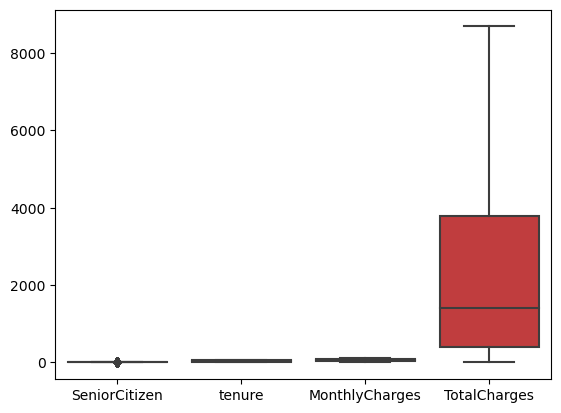

In [13]:
sns.boxplot(data=dados[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])

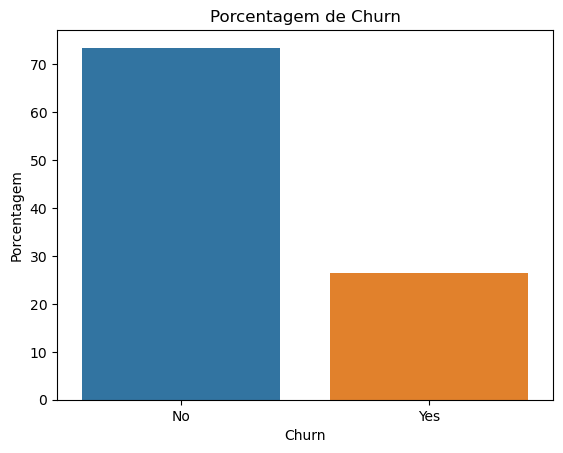

In [14]:
churn_percentages = dados['Churn'].value_counts(normalize=True) * 100
sns.barplot(x=churn_percentages.index, y=churn_percentages.values)
plt.title('Porcentagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem')
plt.show()

In [15]:
((7043 - 5174)*100)/7043

26.536987079369588

As classes estão levemente desbalanceadas.
Verificamos também nesse dataset uma porcentagem de 26,5% de churn

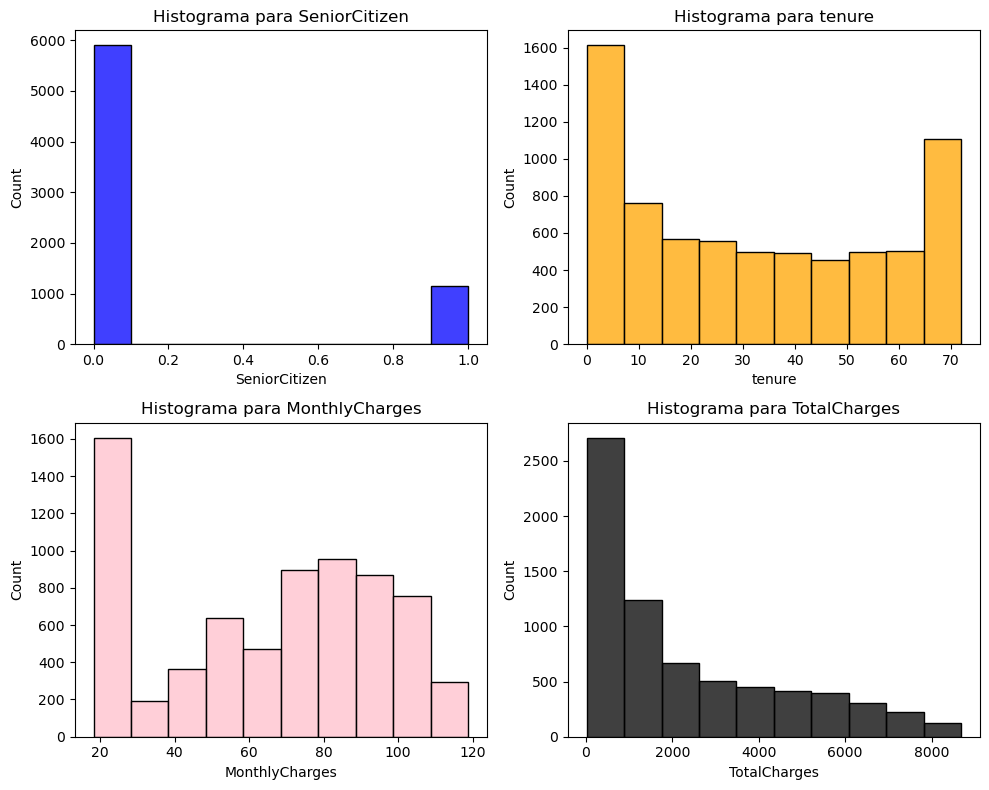

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(dados['SeniorCitizen'], bins=10, kde=False, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Histograma para SeniorCitizen')


sns.histplot(dados['tenure'], bins=10, kde=False, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Histograma para tenure')


sns.histplot(dados['MonthlyCharges'], bins=10, kde=False, color='pink', ax=axes[1, 0])
axes[1, 0].set_title('Histograma para MonthlyCharges')


sns.histplot(dados['TotalCharges'], bins=10, kde=False, color='black', ax=axes[1, 1])
axes[1, 1].set_title('Histograma para TotalCharges')

plt.tight_layout()
plt.show()

Pelos histogramas, podemos observar que existe um grande número de clientes novos e clientes mais antigos.
Muitos clientes efetuam pagamento mensal baixo, de aproximadamente 20 (moeda local).
Muitos clientes tem baixo valor total pago (abaixo de 1000).

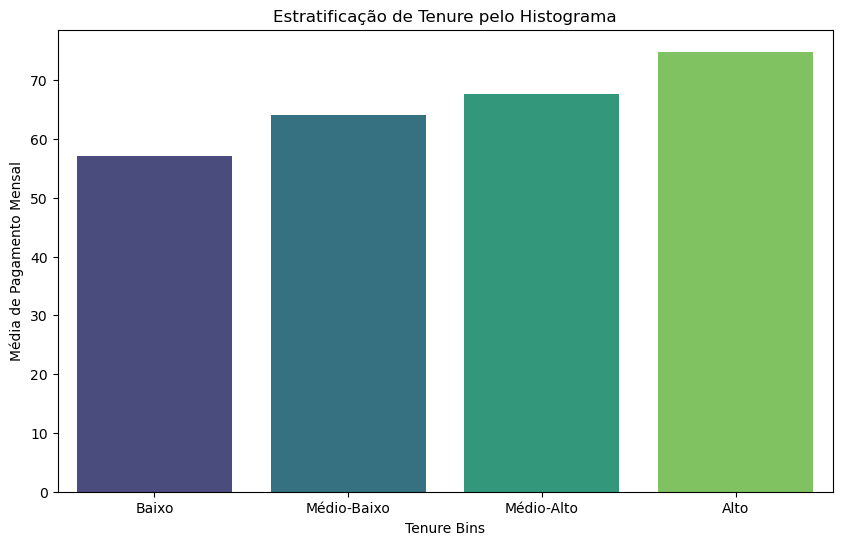

In [106]:
tenure_bins = pd.cut(dados['tenure'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
dados['tenure_bins'] = tenure_bins
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_bins', y='MonthlyCharges', data=dados, ci=None, palette='viridis')
plt.title('Estratificação de Tenure pelo Histograma')
plt.xlabel('Tenure Bins')
plt.ylabel('Média de Pagamento Mensal')
plt.show()

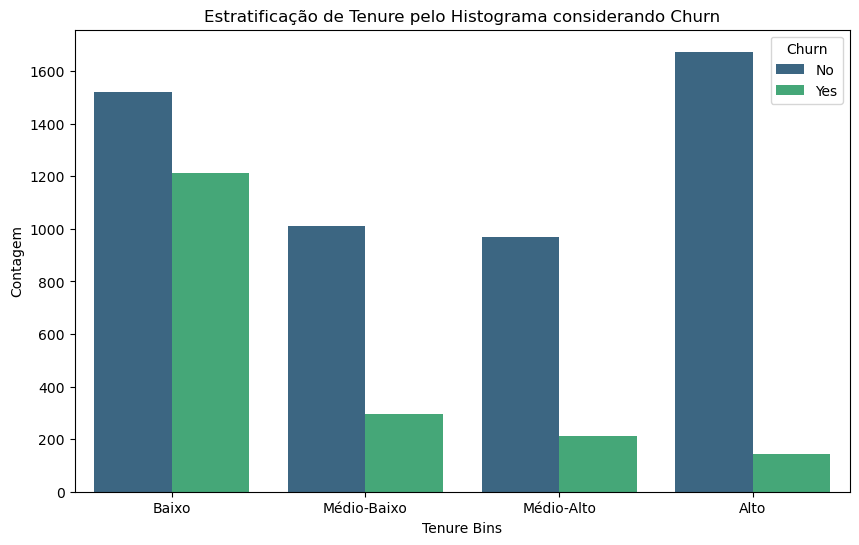

In [18]:
dados['Churn'] = dados['Churn'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_bins', hue='Churn', data=dados, palette='viridis')
plt.title('Estratificação de Tenure pelo Histograma considerando Churn')
plt.xlabel('Tenure Bins')
plt.ylabel('Contagem')
plt.show()

In [151]:
MonthlyCharges_bins = pd.cut(dados['MonthlyCharges'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
dados['MonthlyCharges_bins'] = MonthlyCharges_bins

Observamos que os cliente novos tendem a ter pagamentos mensais mais baixos. E também tem mais churn, proporcionalmente, nessa faixa de tempo de permanência como cliente.

In [19]:
dados_1 = dados[(dados['InternetService'] != "No") 
                  & (dados['StreamingTV'] == "Yes") 
                  & (dados['StreamingMovies'] == "Yes")
                  & (dados['PhoneService'] == "Yes")]

In [20]:
tenure = dados_1[(dados_1['tenure_bins'] == "Alto")]
tenure.shape

(761, 22)

In [21]:
valor_maximo = tenure['tenure'].max()
valor_minimo = tenure['tenure'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 72
Valor Mínimo: 55


In [22]:
dados_1.shape

(1740, 22)

In [23]:
tenure = dados_1[(dados_1['tenure_bins'] == "Baixo")]
tenure.shape

(332, 22)

In [24]:
(761*100)/1740

43.735632183908045

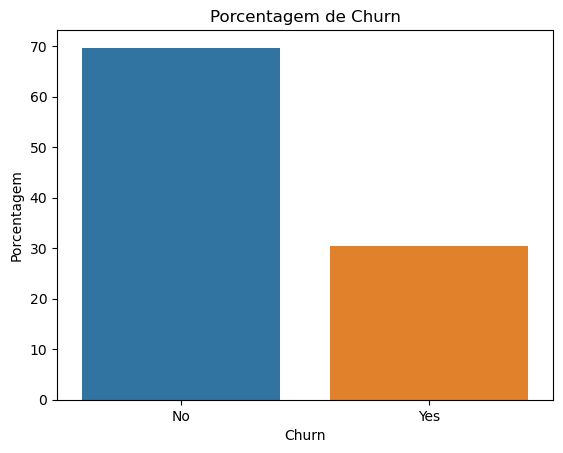

In [25]:
churn_percentages = dados_1['Churn'].value_counts(normalize=True) * 100
sns.barplot(x=churn_percentages.index, y=churn_percentages.values)
plt.title('Porcentagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem')
plt.show()

Considerando os cliente que tem mais de um produto, o churn parece ligeiramente mais alto, chegando a mais de 30%.

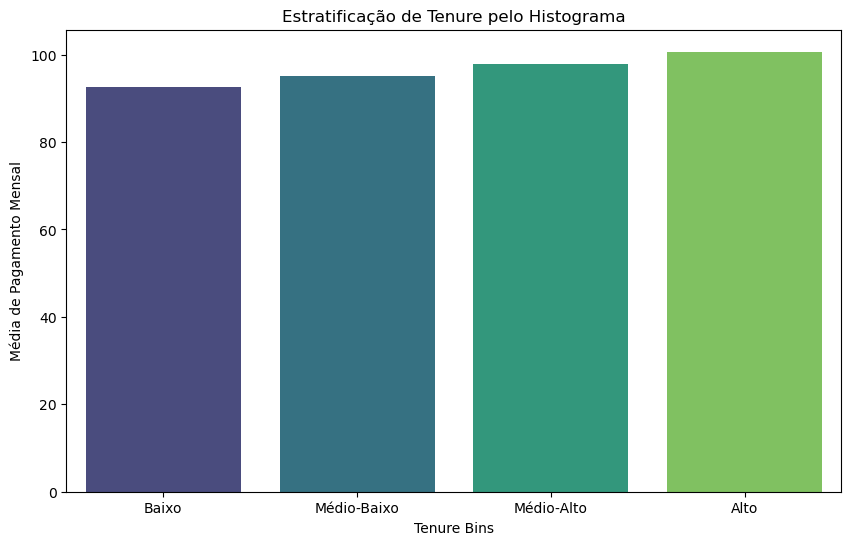

In [26]:
tenure_bins = pd.cut(dados_1['tenure'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
dados_1['tenure_bins'] = tenure_bins
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_bins', y='MonthlyCharges', data=dados_1, ci=None, palette='viridis')
plt.title('Estratificação de Tenure pelo Histograma')
plt.xlabel('Tenure Bins')
plt.ylabel('Média de Pagamento Mensal')
plt.show()

Os valores praticados com esses clientes não tem muita variação em relação ao tempo de cliente.

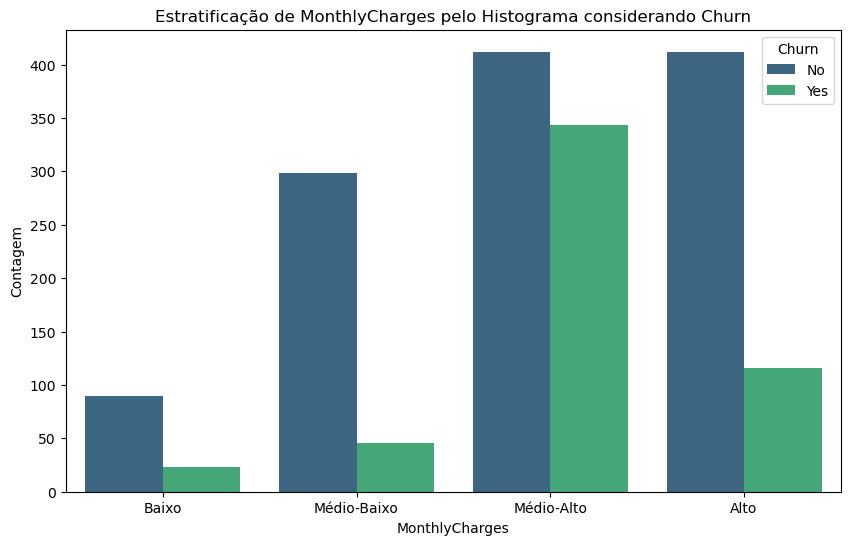

In [27]:
MonthlyCharges_bins = pd.cut(dados_1['MonthlyCharges'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
dados_1['MonthlyCharges_bins'] = MonthlyCharges_bins
dados_1['Churn'] = dados_1['Churn'].astype('category')

# Plotar um gráfico de barras estratificado por bins do tenure e Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='MonthlyCharges_bins', hue='Churn', data=dados_1, palette='viridis')
plt.title('Estratificação de MonthlyCharges pelo Histograma considerando Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Contagem')
plt.show()

Mas o churn parece ligeiramente mais alto entre clientes que tem mais de um produto e em uma faixa média alta de valor, entre 90 e 105.

In [28]:
dados_2 = dados_1[(dados_1['tenure_bins'] == 'Alto')]

In [29]:
dados_2.shape

(761, 23)

In [30]:
valor_maximo = dados_2['MonthlyCharges'].max()
valor_minimo = dados_2['MonthlyCharges'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 118.75
Valor Mínimo: 70.1


In [31]:
dados_4 = dados[(dados['tenure_bins'] == 'Baixo')]
dados_4.shape

(2734, 22)

In [32]:
dados_4 = dados_4[(dados_4['StreamingTV'] == "Yes") | (dados_4['StreamingMovies'] == "Yes")]

In [33]:
#dados_4 = dados_4[(dados_4['StreamingTV'] == "") & (dados_4['StreamingMovies'] == "No") 
#                  & (dados_4['InternetService'] != "No")  & (dados_4['PhoneService'] == "Yes")]

In [34]:
dados_4.shape

(957, 22)

In [35]:
(957*100)/2734

35.00365764447696

In [36]:
valor_maximo = dados_4['MonthlyCharges'].max()
valor_minimo = dados_4['MonthlyCharges'].min()

print(f"Valor Máximo: {valor_maximo}")

print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 112.95
Valor Mínimo: 33.9


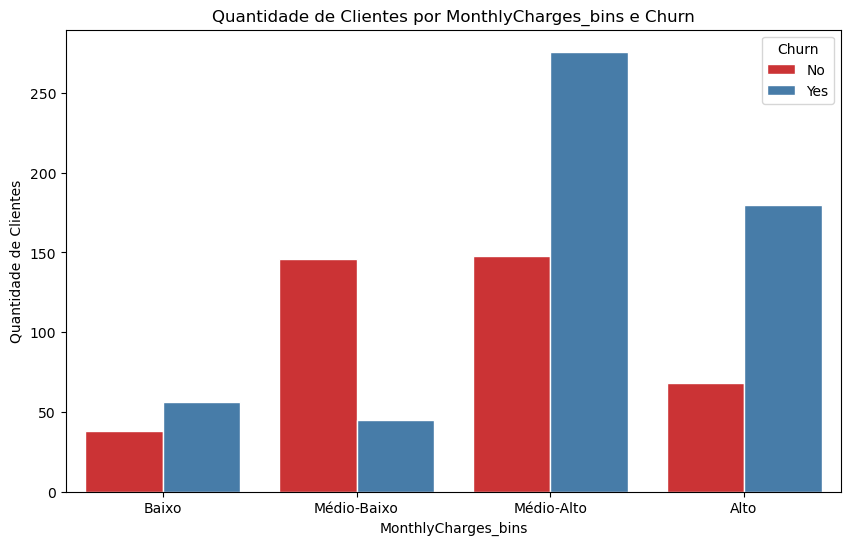

In [37]:
MonthlyCharges_bins = pd.cut(dados_4['MonthlyCharges'], bins=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
dados_4['MonthlyCharges_bins'] = MonthlyCharges_bins
dados_4['Churn'] = dados_4['Churn'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(x='MonthlyCharges_bins', hue='Churn', data=dados_4, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por MonthlyCharges_bins e Churn')
plt.xlabel('MonthlyCharges_bins')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

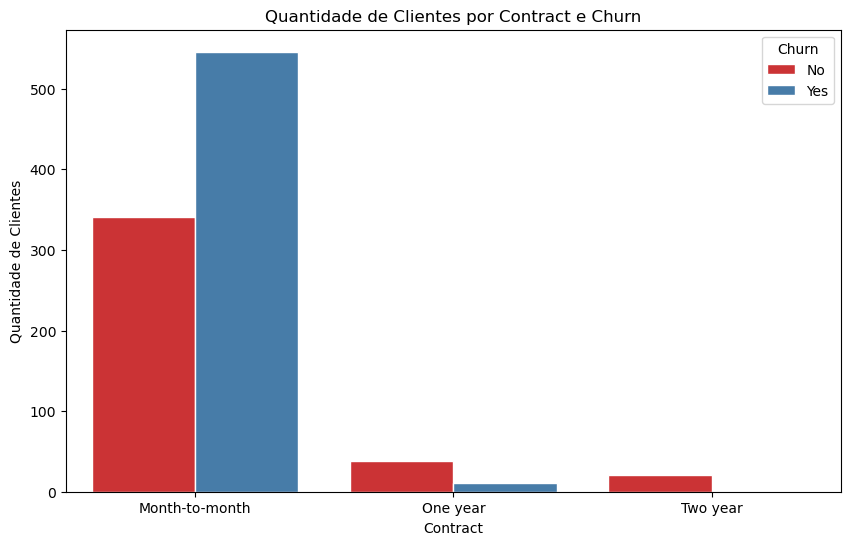

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=dados_4, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Contract e Churn')
plt.xlabel('Contract')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

In [39]:
dados_3 = dados[(dados['tenure_bins'] == 'Baixo') | (dados['tenure_bins'] == 'Alto')]

In [40]:
dados_3.shape

(4553, 22)

In [41]:
dados_3 = dados_3[(dados_3['OnlineSecurity'] == "Yes") 
                  & (dados_3['OnlineBackup'] == "Yes") 
                  & (dados_3['DeviceProtection'] == "Yes")
                  & (dados_3['TechSupport'] == "Yes")]

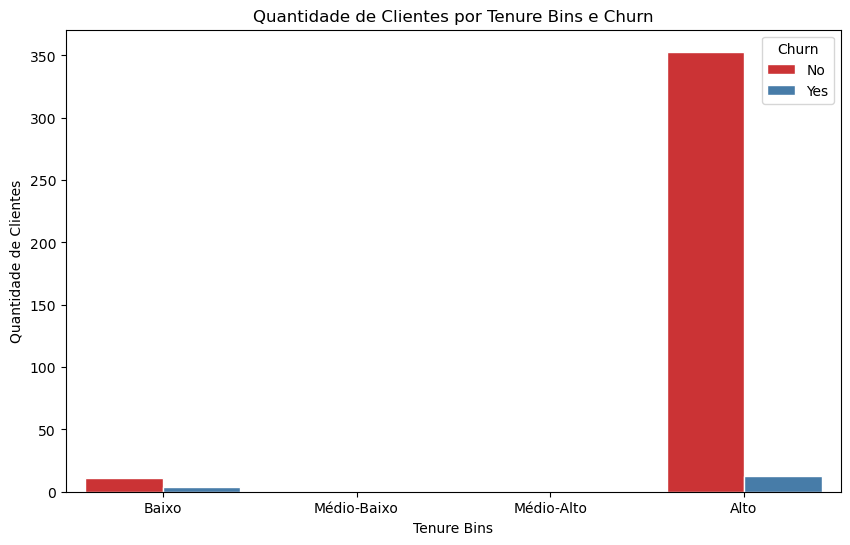

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_bins', hue='Churn', data=dados_3, palette='Set1', edgecolor='w')

# Adicione rótulos e título
plt.title('Quantidade de Clientes por Tenure Bins e Churn')
plt.xlabel('Tenure Bins')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', loc='upper right')

plt.show()

É possível estabelecer algumas correlações entre as variáveis numéricas, como entre TotalCharges e tenure. Como observamos, quanto maior o tempo na empresa, maior o pagamento mensal.

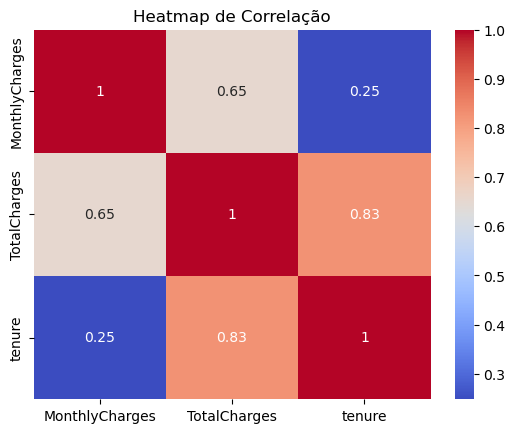

In [43]:
correlacao = dados[['MonthlyCharges','TotalCharges', 'tenure']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

# Treinamento dos modelos

# Todos os clientes

In [107]:
def split(data, target_variable):
    X_train, X_test, y_train, y_test = train_test_split(
                                                    data[columns_to_model], 
                                                    data[target_variable], 
                                                    stratify=data[target_variable], 
                                                    random_state=42
                                                    )
    return X_train, X_test, y_train, y_test

In [182]:
columns_to_model = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',        'Contract',
                    'PaperlessBilling',     'PaymentMethod', 'Churn',
                   'SeniorCitizen', 'tenure',  'MonthlyCharges',  'TotalCharges', 'MonthlyCharges_bins']

X_train, X_test, y_train, y_test = split(data=dados[columns_to_model],  target_variable='Churn')

In [163]:
X_train.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MonthlyCharges_bins
6736,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),No,0,38,19.60,763.10,Baixo
3564,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,70.15,70.15,Médio-Alto
2446,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,One year,No,Credit card (automatic),No,0,23,81.85,1810.85,Médio-Alto
1488,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,Yes,0,4,93.50,362.20,Médio-Alto
5877,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,Yes,0,5,21.05,113.85,Baixo


In [183]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [165]:
X_train.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MonthlyCharges_bins
0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),No,0,38,19.60,763.10,Baixo
1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,70.15,70.15,Médio-Alto
2,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,One year,No,Credit card (automatic),No,0,23,81.85,1810.85,Médio-Alto
3,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,Yes,0,4,93.50,362.20,Médio-Alto
4,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,Yes,0,5,21.05,113.85,Baixo


In [184]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_subset = X_train[selected_columns]
scaler = StandardScaler()
X_train[['tenure_scaler','MonthlyCharges_scaler','TotalCharges_scaler']] = pd.DataFrame(scaler.fit_transform(X_train_subset), columns=selected_columns)
X_train = X_train.drop(['tenure','MonthlyCharges','TotalCharges', 'Churn'], axis=1)

In [185]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_test_subset = X_test[selected_columns]
scaler = StandardScaler()
X_test[['tenure_scaler','MonthlyCharges_scaler','TotalCharges_scaler']] = pd.DataFrame(scaler.fit_transform(X_test_subset), columns=selected_columns)
X_test = X_test.drop(['tenure','MonthlyCharges','TotalCharges', 'Churn'], axis=1)

In [186]:
y_train = y_train.replace('No', 0).replace('Yes', 1)
y_test = y_test.replace('No', 0).replace('Yes', 1)

In [177]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

columns_to_encoder=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',        'Contract',
                       'PaperlessBilling',     'PaymentMethod', 'SeniorCitizen']

list_models = [XGBClassifier, LogisticRegression, RandomForestClassifier]

for model in list_models:

    if model == LogisticRegression:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(drop='first'), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'classifier__penalty': ['l1', 'l2']}
        
    if model == RandomForestClassifier:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__n_estimators': [50, 100, 200],
                  'classifier__max_depth': [4, 6, 8],
                  'classifier__max_features': [6, 8, 10],
                  'classifier__max_features': ['sqrt', 'log2']}
        
    if model == XGBClassifier:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__max_depth': [4, 6, 8]}
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model())])

    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    predict_test = grid_search.predict(X_test) 
     
    if model == LogisticRegression:
        print(model)
        print("Metrics:")
        print(classification_report(y_true = y_test, y_pred = predict_test))
        best_model = grid_search.best_estimator_
        modelo_logistico = best_model.named_steps['classifier']
        coefs = modelo_logistico.coef_
        feature_importances = dict(zip(X_train.columns, coefs[0]))
        print("Feature Importances:")
        for feature, importance in sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True):
            print(f'{feature}: {importance}')
            
    else:
        print(model)
        print("Metrics:")
        print(classification_report(y_true = y_test, y_pred = predict_test))
        feature_importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
        print("Feature Importances:")
        for feature, importance in zip(columns_to_encoder, feature_importances):
            print(f"{feature}: {importance}")

<class 'xgboost.sklearn.XGBClassifier'>
Metrics:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1294
           1       0.60      0.67      0.63       467

    accuracy                           0.80      1761
   macro avg       0.74      0.76      0.75      1761
weighted avg       0.80      0.80      0.80      1761

Feature Importances:
Partner: 0.029812658205628395
Dependents: 0.0
PhoneService: 0.02323005348443985
MultipleLines: 0.0
InternetService: 0.0032131958287209272
OnlineSecurity: 0.0
OnlineBackup: 0.025439459830522537
DeviceProtection: 0.0
TechSupport: 0.005160347558557987
StreamingTV: 0.020773185417056084
StreamingMovies: 0.05927716940641403
Contract: 0.006986470893025398
PaperlessBilling: 0.07863456755876541
PaymentMethod: 0.0
SeniorCitizen: 0.008972028270363808
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Metrics:
              precision    recall  f1-score   support

           0       0.90      0.75  

In [178]:
len(predict_test)

1761

In [179]:
len(list(filter(lambda x: x == 1, predict_test)))

708

In [180]:
708*0.77

545.16

In [181]:
545/1761

0.3094832481544577

Churn de 30%

In [187]:
predict_refatorado = X_test

In [188]:
predict_refatorado.loc[predict_refatorado['MonthlyCharges_bins'] == 'Alto-Médio', 'MonthlyCharges_scaler'] = 0.11798599631889342

In [201]:
predict_refatorado['InternetService'] = predict_refatorado['InternetService'].replace('No', 'DSL')
predict_refatorado['StreamingTV'] = predict_refatorado['StreamingTV'].replace('No', 'Yes')
predict_refatorado['StreamingMovies'] = predict_refatorado['StreamingMovies'].replace('No', 'Yes')
predict_refatorado['PhoneService'] = predict_refatorado['PhoneService'].replace('No', 'Yes')
predict_refatorado['OnlineSecurity'] = predict_refatorado['OnlineSecurity'].replace('No', 'Yes')
predict_refatorado['OnlineBackup'] = predict_refatorado['OnlineBackup'].replace('No', 'Yes')
predict_refatorado['DeviceProtection'] = predict_refatorado['DeviceProtection'].replace('No', 'Yes')
predict_refatorado['TechSupport'] = predict_refatorado['TechSupport'].replace('No', 'Yes')
predict_refatorado['TechSupport'] = predict_refatorado['TechSupport'].replace('No', 'Yes')
predict_refatorado['Contract'] = predict_refatorado['Contract'].replace('Month-to-month', 'Two year')
predict_refatorado['PaymentMethod'] = 'Credit card (automatic)'

In [190]:
predict_refatorado = predict_refatorado.drop(['MonthlyCharges_bins'],axis=1)

In [202]:
predict = grid_search.predict(predict_refatorado) 

In [203]:
len(predict)

1761

In [204]:
len(list(filter(lambda x: x == 1, predict)))

0

In [199]:
0.73*1761

1285.53

In [197]:
1761-1285

476

In [196]:
476/1761

0.27030096536059056

In [200]:
0.3094832481544577-0.27030096536059056

0.03918228279386715

# Considerando somente os clientes mais recentes

In [80]:
dataset_filtrado = dados[dados['tenure_bins'] == "Baixo"]

In [81]:
valor_maximo = dataset_filtrado['tenure'].max()
valor_minimo = dataset_filtrado['tenure'].min()

print(f"Valor Máximo: {valor_maximo}")
print(f"Valor Mínimo: {valor_minimo}")

Valor Máximo: 18
Valor Mínimo: 0


In [82]:
columns_to_model = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',        'Contract',
                    'PaperlessBilling',     'PaymentMethod', 'Churn',
                   'SeniorCitizen', 'tenure',  'MonthlyCharges',  'TotalCharges']

X_train, X_test, y_train, y_test = split(data=dataset_filtrado[columns_to_model],  target_variable='Churn')

In [83]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [84]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_subset = X_train[selected_columns]
scaler = StandardScaler()
X_train[['tenure_scaler','MonthlyCharges_scaler','TotalCharges_scaler']] = pd.DataFrame(scaler.fit_transform(X_train_subset), columns=selected_columns)
X_train = X_train.drop(['tenure','MonthlyCharges','TotalCharges', 'Churn'], axis=1)

In [85]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_test_subset = X_test[selected_columns]
scaler = StandardScaler()
X_test[['tenure_scaler','MonthlyCharges_scaler','TotalCharges_scaler']] = pd.DataFrame(scaler.fit_transform(X_test_subset), columns=selected_columns)
X_test = X_test.drop(['tenure','MonthlyCharges','TotalCharges', 'Churn'], axis=1)

In [86]:
y_train = y_train.replace('No', 0).replace('Yes', 1)
y_test = y_test.replace('No', 0).replace('Yes', 1)

In [87]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

columns_to_encoder=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',        'Contract',
                       'PaperlessBilling',     'PaymentMethod', 'SeniorCitizen']

list_models = [XGBClassifier, LogisticRegression, RandomForestClassifier]

for model in list_models:

    if model == LogisticRegression:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(drop='first'), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'classifier__penalty': ['l1', 'l2']}
        
    if model == RandomForestClassifier:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__n_estimators': [50, 100, 200],
                  'classifier__max_depth': [4, 6, 8],
                  'classifier__max_features': [6, 8, 10],
                  'classifier__max_features': ['sqrt', 'log2']}
        
    if model == XGBClassifier:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(), columns_to_encoder)],
            remainder='passthrough')
        
        params = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__max_depth': [4, 6, 8]}
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model())])

    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    predict_test = grid_search.predict(X_test) 
     
    if model == LogisticRegression:
        print(model)
        print("Metrics:")
        print(classification_report(y_true = y_test, y_pred = predict_test))
        best_model = grid_search.best_estimator_
        modelo_logistico = best_model.named_steps['classifier']
        coefs = modelo_logistico.coef_
        feature_importances = dict(zip(X_train.columns, coefs[0]))
        print("Feature Importances:")
        for feature, importance in sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True):
            print(f'{feature}: {importance}')
            
    else:
        print(model)
        print("Metrics:")
        print(classification_report(y_true = y_test, y_pred = predict_test))
        feature_importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
        print("Feature Importances:")
        for feature, importance in zip(columns_to_encoder, feature_importances):
            print(f"{feature}: {importance}")

<class 'xgboost.sklearn.XGBClassifier'>
Metrics:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       380
           1       0.66      0.71      0.69       304

    accuracy                           0.71       684
   macro avg       0.71      0.71      0.71       684
weighted avg       0.71      0.71      0.71       684

Feature Importances:
Partner: 0.007599380798637867
Dependents: 0.0
PhoneService: 0.011207307688891888
MultipleLines: 0.0
InternetService: 0.015186627395451069
OnlineSecurity: 0.0
OnlineBackup: 0.020166918635368347
DeviceProtection: 0.0
TechSupport: 0.007636025082319975
StreamingTV: 0.015359689481556416
StreamingMovies: 0.3930782973766327
Contract: 0.0
PaperlessBilling: 0.18547621369361877
PaymentMethod: 0.0
SeniorCitizen: 0.008747508749365807
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Metrics:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       380